In [1]:
  # @title Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
# @title Download dataset from kaggle

#set api credentials
import os
os.environ['KAGGLE_USERNAME'] = 'rohanmacwan'
os.environ['KAGGLE_KEY'] = 'aab722f481d50e84990344b31ed54a68'

In [3]:
#download datasets
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 67.5MB/s]


In [4]:
#unzip the file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [5]:
# @title Load data and exploring the data

#load data into dataframe
df = pd.read_csv('/content/data.csv')


In [6]:
#display the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [8]:
#count null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
#now drop the columns null values
df.dropna(axis=1,inplace=True)

In [10]:
df.shape

(569, 32)

In [11]:
#get count of M and B cells in diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [12]:
# @title Label encoding

#get datatypes from each column
df.dtypes


,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [47]:
#encode the diagnosis column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(df.iloc[:,1].values)
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)
print(df['diagnosis'].dtype)
df['diagnosis'] = df['diagnosis'].astype(int)
print(df['diagnosis'].dtype)

int64
int64


In [48]:
df.head(
)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370.0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,426.0,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,406.0,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,98.0,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,418.0,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
df.shape

(569, 31)

In [50]:
#drop the id column
df.drop('id',axis=1,inplace=True)

KeyError: "['id'] not found in axis"

In [51]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370.0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,426.0,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,406.0,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,98.0,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,418.0,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
# @title Split the data

#split data into x and y
X=df.iloc[:,1:].values
y=df.iloc[:,0].values



In [53]:
#splitting data into 70/30
#70 for training and 30 for testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30)

In [54]:
#scaling the data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train = stdsc.fit_transform(X_train)
x_test = stdsc.transform(X_test)


In [55]:
y_train

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [57]:
# @title Build logistic regression model

from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(x_train,y_train)



LogisticRegression()

In [59]:
#predeicting

pred = mod.predict(x_test)

In [60]:
# @title Performance evaluation


[[102   1]
 [  4  64]]


<Axes: >

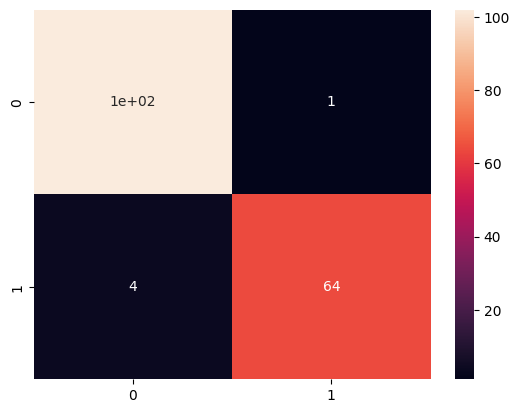

In [62]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [63]:
#get accuracy of our model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9707602339181286
